Libraries Imported


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [3]:
df.head() # to check top 5 rows

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
df.columns # to check columns name

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [6]:
df.isnull().sum() # to check the null value in dataset


,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [7]:
# Handle missing value of budget using 0
df['budget'].fillna(0, inplace=True)


In [8]:
# Handle missing value of hourly_low using 0
df['hourly_low'].fillna(0, inplace=True)


In [9]:
# Handle missing value of hourly_high using 0
df['hourly_high'].fillna(0, inplace=True)


In [10]:
# Handle missing value of country
df['country'].fillna('Unknown', inplace=True)

In [11]:
#drop in title missing value
df.dropna(subset=['title'], inplace=True)

In [12]:
#drop in link missing value
df.dropna(subset=['link'], inplace=True)


In [13]:
df.isnull().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0


In [14]:
df.head(10)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,0.0,0.0,500.0,Unknown
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,0.0,0.0,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,0.0,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,0.0,0.0,0.0,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,0.0,0.0,650.0,India
5,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,0.0,0.0,0.0,Portugal
6,Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,False,0.0,0.0,5.0,India
7,need Portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05+00:00,True,7.0,22.0,0.0,India
8,Looker Studio Dashboard for Leadgen and E-Comm...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24+00:00,True,0.0,0.0,0.0,Germany
9,PHP/HTML/CSS WordPress Developer Needed for We...,https://www.upwork.com/jobs/PHP-HTML-CSS-WordP...,2024-02-17 09:06:21+00:00,False,0.0,0.0,500.0,Canada


In [15]:
!pip install nltk
import nltk
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the 'stopwords' dataset
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-z\s]', '', title)
    words = [lemmatizer.lemmatize(word) for word in title.split() if word not in stop_words]
    return ' '.join(words)

# Change 'reviews.text\t' to 'reviews.text'
df['cleaned_title'] = df['title'].apply(clean_title)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
df['cleaned_title'] # data cleaned after removing stopwords and in lowe case

,cleaned_title
0,experienced medium buyer solar pannel roofing ...
1,full stack developer
2,smma bubble app
3,talent hunter specialized marketing
4,data engineer
...,...
244823,need facebook advertising expert launch product
244824,digitaltelemarketingsalesoutside sale
244825,wordpress template edits
244826,elementor pro quick fix wordpress


In [17]:
# Tokenize and clean
import nltk
from collections import Counter # Import Counter here

# Download punkt_tab resource
try:
    nltk.data.find('tokenizers/punkt_tab/english/')
except LookupError:
    nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) # Re-define stop_words if not globally available

# Process each cleaned title in the DataFrame
all_tokens = []
for title in df['cleaned_title']:
    tokens = word_tokenize(title.lower())
    # Filter tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_tokens.extend(tokens)

# Count keyword frequencies
keyword_counts = Counter(all_tokens)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
# Top keywords
top_keywords = keyword_counts.most_common(10)
print("Top Keywords:", top_keywords)

Top Keywords: [('needed', 17571), ('website', 17571), ('video', 16191), ('developer', 15998), ('expert', 15251), ('design', 13513), ('designer', 12839), ('need', 10609), ('amp', 9277), ('specialist', 9047)]


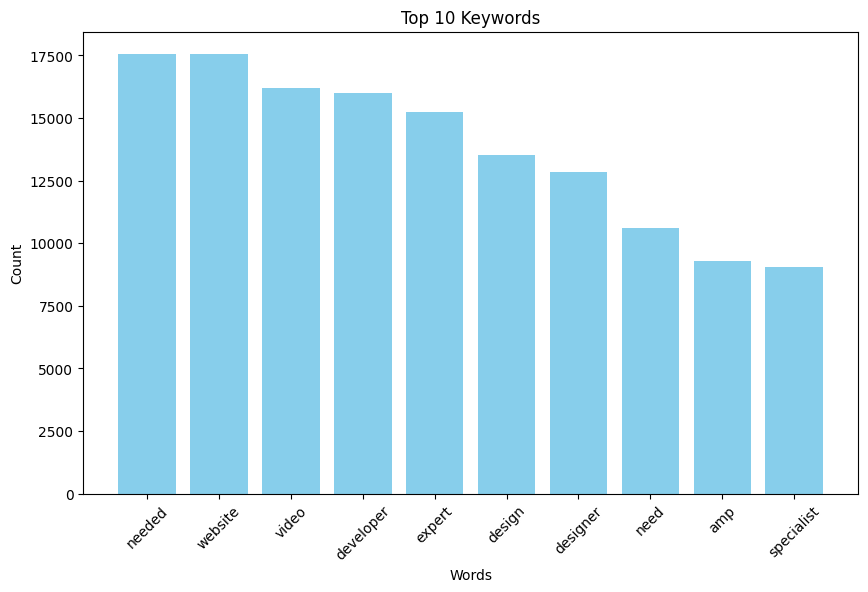

In [19]:
#visualization of top keywords
top_keywords = keyword_counts.most_common(10)
words, counts = zip(*top_keywords)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Keywords')
plt.xticks(rotation=45)
plt.show()



The bar chart titled "Top 10 Keywords" displays the frequency of specific words, with "needed" being the most prominent at approximately 17,500 counts

In [20]:
# Find job types from title
# job_type_keywords = {
#     'Web Developer': ['web', 'frontend', 'backend', 'html', 'css', 'javascript', 'react', 'vue'],
#     'Mobile Developer': ['mobile', 'android', 'ios', 'flutter', 'react native', 'swift', 'kotlin'],
#     'Software Developer': ['developer', 'programmer', 'engineer', 'python', 'java', 'c#', '.net', 'node'],
#     'Data / AI / ML': ['data', 'machine learning', 'ml', 'ai', 'deep learning', 'analytics'],
#     'Pitch Deck / Business Plan': ['pitch deck', 'business plan', 'deck design', 'hedge fund', 'startup pitch'],
#     'Targeting / Campaign Strategy': ['targeting specialist', 'media outreach', 'campaign strategy'],
#     'Animator / Motion': ['stickman animator', 'video editing', 'videographer', '3d clothing design', 'clo3d'],
#     'Accessibility / WCAG': ['wcag', 'accessibility', 'readable development'],
#     'Business Registration / Legal Setup': ['registering an llc', 'compliance review', 'local compliance', 'vmware decomm'],
#     'Engineering / Lab Reports': ['lab report', 'beam', 'load', 'support calculation'],
#     'Product / Industrial Design': ['multifunctional products', 'product concept', 'landscape plan'],
#     'Operations / Process Executive': ['process executive', 'operations', 'admin process'],
#     'Mixed Reality / XR / AR': ['mixed reality', 'xr', 'ar', 'advertising video'],
#     'Google Reviews / Reputation Mgmt': ['google business profile', 'review creation'],
#     'Optical / Retail Store Marketing': ['optical shop', 'store promotion'],
#     'Lead Generation / B2B': ['generate lead lists', 'business development', 'linkedin connections'],
#     'E-Commerce Management': ['prestashop', 'woocommerce', 'e-commerce', 'high ticket'],
#     'Education / Training / Manager': ['education business', 'training manager'],
#     'Compliance / Audit': ['internal audit report', 'industry standards audit'],
#     'Clothing / Apparel Design': ['3d clothing', 'clo3d', 'clothing model', 'fashion'],
#     'Media / PR': ['media outreaching', 'publicist', 'press contact'],
#     'Achievements / Resume Help': ['significant achievements', 'resume help'],
#     'Slide / Presentation Design': ['slides', 'presentation', 'powerpoint'],
#     'JS / Code Snippet Help': ['decode js snippet', 'javascript help'],
#     'Video Effects / Color / Render': ['replace color video', 'video editing', 'video render'],
#     'CMS Migration / WordPress': ['kajabi', 'wordpress', 'plugin update', 'woocommerce'],
#     'MacOS / OS Install / Config': ['install macos', 'os install', 'macbook pro'],
#     'VPN / Network Config': ['pfsense', 'vpn', 'traffic filter'],
#     'Project Management Tools': ['asana', 'project tool setup'],
#     'Copywriting / Short Writing': ['200 words per page', 'copy writing', 'rewrite'],
#     'AI / Spanish AI Expert': ['inteligencia artificial', 'ai expert', 'spanish ai'],
#     'Client Acquisition / Travel Sales': ['travelling client source', 'agent', 'sales travel'],
#     'Graphics / Print Materials': ['print materials', 'high res logo', 'solar energy', 'logo recreate'],
#     'Accounting / Finance': ['accounting specialist', 'audit review'],
#     'Membership / CRM Cleanup': ['medlemsregister', 'crm cleanup', 'address list'],
#     'SAP / ERP Consultant': ['sap', 'erp', 'sap pp', 'sap sd'],
#     'YouTube / Video Content': ['youtube', 'youtube ads', 'youtube growth', 'youtube shorts'],
#     'Fashion / Modeling': ['fashion model', 'female model', 'fashion shoot'],
#     '3D / Product Mockup': ['3d mockup', 'product mockup', 'dimension', 'dieline', '3d photo'],
#     'Product Research / Sourcing': ['product research', 'sourcing', 'market research', 'reverse image search', 'find product'],
#     'E-commerce Support': ['ebay', 'woo commerce', 'shopify store setup', 'online store', 'open ebay'],
#     'Script Writing / Storyboard': ['script writing', 'storyboard', 'screenplay', 'narrative script'],
#     'Business Services': ['register non-profit', 'visa help', 'business bank'],
#     'Photography / Videography': ['photographer', 'photo edit', 'event photographer', 'product photographer'],
#     'Language Testing / Translation': ['language test', 'grader', 'test grader'],
#     'Mockup / Illustration / Design': ['illustration', 'storyboard', 'mockup', 'brochure', 'business card', 'tshirt'],
#     'Fashion / Apparel': ['hoodie design', 'tshirt design', 'fashion brand'],
#     'Digital Marketing / Social': ['digital marketer', 'social media growth', 'engagement growth', 'linkedin posts'],
#     'Freelance / Gig Help': ['find me work', 'freelancer help', 'freelance work'],
#     'Hardware / IoT / Pi': ['raspberry pi', 'pico', 'poe', 'rs232', 'board'],
#     'Email / Newsletter': ['newsletter', 'monthly news'],
#     'Adobe / Design Expert': ['adobe dimension', 'adobe expert', 'brochure design'],
#     'Creative Writing / Content': ['script writing', 'newsletter', 'content creation'],
#     'AI / GPT / LLM': ['gpt', 'chatgpt', 'llm', 'openai', 'generative ai'],
#     'Designer': ['designer', 'graphic', 'ui', 'ux', 'figma', 'photoshop', 'illustrator'],
#     'Marketing': ['marketing', 'media buyer', 'seo', 'smm', 'ppc', 'ads', 'sem', 'google ads'],
#     'Sales': ['sales', 'lead generation', 'cold calling', 'closer', 'b2b'],
#     'Writer / Content': ['writer', 'content', 'copywriter', 'blog', 'editor', 'proofreading'],
#     'Recruiter / HR': ['recruiter', 'headhunter', 'talent', 'hr', 'hiring'],
#     'Admin / VA': ['virtual assistant', 'admin', 'assistant', 'va', 'data entry'],
#     'Finance / Legal': ['accountant', 'finance', 'bookkeeper', 'tax', 'legal', 'lawyer'],
#     'Project Manager': ['project manager', 'scrum', 'product owner', 'agile'],
#     'Customer Support': ['customer support', 'chat support', 'help desk', 'service'],
#     'QA / Testing': ['qa', 'tester', 'testing', 'automation'],
#     'DevOps / IT': ['devops', 'system admin', 'cloud', 'aws', 'azure', 'docker'],
#     'Blockchain / Crypto': ['blockchain', 'crypto', 'nft', 'web3', 'solidity'],
#     'No-Code Developer': ['bubble', 'webflow', 'nocode', 'no-code'],
#     'Game Developer': ['game', 'unity', 'unreal', 'gamedev'],
#     'Video / Audio Editing': ['video editor', 'audio', 'podcast', 'after effects', 'premiere'],
#     'eCommerce / Shopify': ['shopify', 'woocommerce', 'ecommerce', 'amazon', 'dropshipping'],
#     'IT Support / Helpdesk': ['it support', 'helpdesk', 'tech support'],
#     'Translation / Language': ['translator', 'translation', 'localization'],
#     'Business Analyst': ['business analyst', 'requirement gathering', 'brd', 'srs'],
#     'Scraper / Automation': ['scraper', 'scraping', 'web scraping', 'selenium', 'automation', 'bot'],
#     'Content Moderator': ['moderator', 'content moderation', 'moderation'],
#     'Customer Success': ['customer success', 'customer experience', 'account manager'],
#     'Technical Support': ['technical support', 'tech support', 'troubleshooting'],
#     'Education / Training': ['tutor', 'teaching', 'instructor', 'trainer', 'curriculum', 'elearning'],
#     'Healthcare / Medical': ['nurse', 'medical', 'healthcare', 'clinician', 'pharma'],
#     'Operations': ['operations', 'ops manager', 'business operations'],
#     'Executive / C-Level': ['ceo', 'cto', 'cfo', 'coo', 'chief'],
#     'Data Entry / Typing': ['data entry', 'typing', 'form filling'],
#     'Architecture / CAD': ['architect', 'cad', 'autocad', 'revit'],
#     'Human Resources': ['human resources', 'hr generalist', 'hr manager'],
#     'Research': ['researcher', 'research assistant', 'literature review'],
#     'Cold Caller / Appointment Setter': ['cold caller', 'appointment setter', 'intake specialist'],
#     '3D Animator / Motion': ['3d animator', 'animation', 'mp4 animation', 'video production'],
#     'Artist / Illustrator': ['artist', 'wallpapers', 'creative work', 'kids songs'],
#     'Insurance / Legal / Compliance': ['insurance', 'contract maker', 'patent attorney', 'lawyer'],
#     'Music / Audio Production': ['compose beats', 'music producer', 'short songs', 'audio work'],
#     'Chat / Messaging / API': ['chatwoot', 'rocket.chat', 'messaging api', 'push notification'],
#     'Office Tools / MS365 / Outlook': ['ms365', 'outlook add-in', 'power point', 'excel', 'templates'],
#     'Photo / Image Editing': ['watermark', 'image edit', 'remove objects from photo', 'photo editing', 'photo'],
#     'Math / Engineering / Matlab': ['matlab', 'math expert', 'mips', 'f-360', 'engineering'],
#     'PDF / Print / Indesign': ['indesign', 'pdf chart', 'pdf catalog', 'print design'],
#     'CRM / Email / Automation': ['bulk sms', 'highspot', 'crm'],
#     'Product Design': ['grip socks', 'product image', 'catalog', 'design product'],
#     'Voice Over / Translation': ['voice over', 'proofread', 'punjabi', 'female voice'],
#     'Counseling / Coaching': ['counselor', 'marriage', 'therapy', 'sexual counselor'],
#     'TypeScript / Angular': ['typescript', 'angular', 'project restructure'],
#     'Map / Geolocation': ['map', 'location based', 'delivery time'],
#     'eSign / Payment Systems': ['paypal', 'subscription', 'recurring payment'],
#     'Discord / Community Tools': ['discord setup', 'community'],
#     'Security / DevOps': ['bitbucket security', 'security expert'],
#     'Competitor / Market Research': ['competitor analysis', 'public health org', 'market research'],
#     'Royalties / Accounting': ['royalties', 'calculator', 'author royalties'],
#     'Legal / Paralegal': ['paralegal', 'legal assistant', 'contract law'],
#     'Event Management': ['event manager', 'event planning', 'event coordinator'],
#     'Branding / Logo Design': ['logo design', 'branding', 'brand identity', 'brand development'],
#     'Content Creation / Course / eBook': ['ebook', 'online course', 'course creation', 'instructional design', 'elearning'],
#     'Social / Influencer Marketing': ['publicist', 'influencer', 'meme', 'tiktok', 'creator', 'ugc'],
#     'CRM / Marketing Tools': ['gohighlevel', 'mautic', 'crm audit', 'hubspot', 'zoho'],
#     '3D / Architecture / Rendering': ['3d rendering', 'architecture', 'rendering', 'interior', 'sketchup'],
#     'CRO / Analytics': ['conversion rate', 'cro', 'rate optimization', 'ab test'],
#     'Misc Tools / Platforms': ['svelte', 'stan store', 'zoom qt', 'google play console'],
#     'Adult / Niche / Creator': ['onlyfans', 'onlyfriends', 'chatter', 'adult', 'fetish', 'chat model'],
#     'Real Estate': ['real estate', 'realtor', 'property manager'],
#     'Logistics / Supply Chain': ['logistics', 'supply chain', 'inventory', 'warehouse'],
#     'Social Media Manager': ['social media manager', 'instagram', 'facebook page', 'content calendar']}



In [21]:
job_type_keywords = {
    'Web Developer': ['web', 'frontend', 'backend', 'html', 'css', 'javascript', 'react', 'vue'],
    'Mobile Developer': ['mobile', 'android', 'ios', 'flutter', 'react native', 'swift', 'kotlin'],
    'Software Developer': ['developer', 'programmer', 'engineer', 'python', 'java', 'c#', '.net', 'node'],
    'Data / AI / ML': ['data', 'machine learning', 'ml', 'ai', 'deep learning', 'analytics'],
    'AI / GPT / LLM': ['gpt', 'chatgpt', 'llm', 'openai', 'generative ai'],
    'Designer': ['designer', 'graphic', 'ui', 'ux', 'figma', 'photoshop', 'illustrator'],
    'Marketing': ['marketing', 'media buyer', 'seo', 'smm', 'ppc', 'ads', 'sem', 'google ads'],
    'Sales': ['sales', 'lead generation', 'cold calling', 'closer', 'b2b'],
    'Writer / Content': ['writer', 'content', 'copywriter', 'blog', 'editor', 'proofreading'],
    'Recruiter / HR': ['recruiter', 'headhunter', 'talent', 'hr', 'hiring'],
    'Admin / VA': ['virtual assistant', 'admin', 'assistant', 'va', 'data entry'],
    'Finance / Legal': ['accountant', 'finance', 'bookkeeper', 'tax', 'legal', 'lawyer'],
    'Project Manager': ['project manager', 'scrum', 'product owner', 'agile'],
    'Customer Support': ['customer support', 'chat support', 'help desk', 'service'],
    'QA / Testing': ['qa', 'tester', 'testing', 'automation'],
    'DevOps / IT': ['devops', 'system admin', 'cloud', 'aws', 'azure', 'docker'],
    'Blockchain / Crypto': ['blockchain', 'crypto', 'nft', 'web3', 'solidity'],
    'No-Code Developer': ['bubble', 'webflow', 'nocode', 'no-code'],
    'Game Developer': ['game', 'unity', 'unreal', 'gamedev'],
    'Video / Audio Editing': ['video editor', 'audio', 'podcast', 'after effects', 'premiere'],
    'eCommerce / Shopify': ['shopify', 'woocommerce', 'ecommerce', 'amazon', 'dropshipping'],
    'IT Support / Helpdesk': ['it support', 'helpdesk', 'tech support'],
    'Translation / Language': ['translator', 'translation', 'localization'],
    'Business Analyst': ['business analyst', 'requirement gathering', 'brd', 'srs'],
    'Scraper / Automation': ['scraper', 'scraping', 'web scraping', 'selenium', 'automation', 'bot'],
}
# Function to assign job type
def get_job_type(title):
    title_lower = title.lower()
    for job_type, keywords in job_type_keywords.items():
        if any(keyword in title_lower for keyword in keywords):
            return job_type
    return 'Other'

# Apply the function to the title column
df['job_type'] = df['title'].apply(get_job_type)

print(df[['title', 'job_type']])


                                                    title            job_type
0       Experienced Media Buyer For Solar Pannel and R...           Marketing
1                                    Full Stack Developer  Software Developer
2                                         SMMA Bubble App           Marketing
3                  Talent Hunter Specialized in Marketing           Marketing
4                                           Data Engineer  Software Developer
...                                                   ...                 ...
244823  Need Facebook advertising experts to launch pr...               Other
244824          Digital/Telemarketing/Sales/OutSide Sales           Marketing
244825                           WordPress Template Edits               Other
244826            ELEMENTOR PRO For quick fix (Wordpress)            Designer
244827              Creating a UGC Ad for Our Mobile Game    Mobile Developer

[244827 rows x 2 columns]


In [22]:
df['job_type'].value_counts() # find out the job type from title

,count
job_type,
Other,79739
Web Developer,30014
Data / AI / ML,24037
Designer,23352
Writer / Content,16811
Marketing,14611
Software Developer,14166
Admin / VA,8727
Sales,6135


In [23]:
# Sample of some "Other" jobs
print(df[df['job_type'] == 'Other']['title'].sample(50, random_state=1))


64110                     Components and single ticket view
226290    Recreate a logo from example photo with my per...
28002                              Licensed Insurance Agent
110898                    YouTube Subscribe Monetize Growth
100942                                 Experienced Animator
116848    Looking For An Experienced YouTube Voiceover F...
33889                                  Pagespeed fix issues
173709                      Auto Transport Quote Calculator
53357                             Appointment setter in UAE
242904                             Youtube Niche Researcher
231129    Punjabi Proofread and Female Voice Over for La...
82070     Videographer Needed in Melbourne for Small Cor...
142621         Need a travel planner for Italy Honeymoon 🇮🇹
188541                    Forum Link Poster, Reddit posters
100432    Switzerland journalist with press card is urge...
215326                Product Image Editing and Enhancement
166862                           404 err

In [24]:
# find the higest top 20 job types
top_job_types = df['job_type'].value_counts().head(20)
top_job_types

,count
job_type,
Other,79739
Web Developer,30014
Data / AI / ML,24037
Designer,23352
Writer / Content,16811
Marketing,14611
Software Developer,14166
Admin / VA,8727
Sales,6135


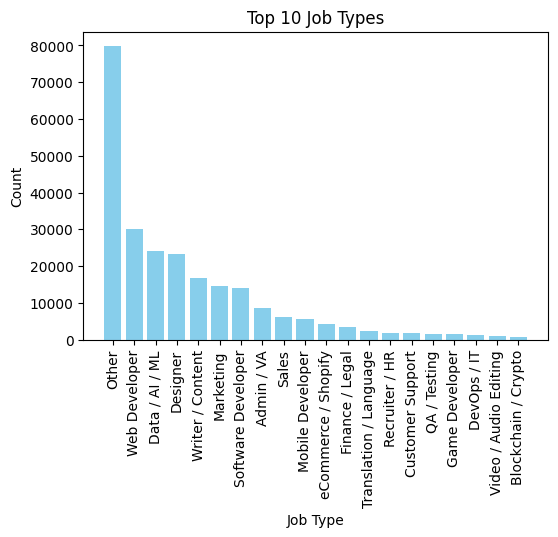

In [25]:
#visualization of 10 job types apart from others
plt.figure(figsize=(6, 4))
plt.bar(top_job_types.index, top_job_types.values, color='skyblue')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Top 10 Job Types')
plt.xticks(rotation=90)
plt.show()


Upskill in high-demand areas like AI/ML, web development, or DevOps to align with market needs.

Competitive hiring in tech roles may require emphasis on perks or remote options.

The data underscores a market prioritizing technical expertise, digital content, and operational support, with pockets of innovation in blockchain and gaming.

In [26]:
df.describe()


,hourly_low,hourly_high,budget
count,244827.000000,244827.000000,244827.000000
mean,7.253943,16.932965,386.778827
std,14.519705,36.711526,10256.494177
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,10.000000,25.000000,50.000000
max,998.000000,999.000000,1000000.000000


Data contains a lot of zeros (likely missing or unreported values) especially for hourly rates and budget.

Distributions for these features are highly right-skewed with extreme outliers.

Median and lower quartiles being zero indicates a majority of entries either don’t report these values or genuinely have very low rates/budgets.

.

In [27]:
df['published_date'] = pd.to_datetime(df['published_date'])


In [28]:
df['published_date']

,published_date
0,2024-02-17 09:09:54+00:00
1,2024-02-17 09:09:17+00:00
2,2024-02-17 09:08:46+00:00
3,2024-02-17 09:08:08+00:00
4,2024-02-17 09:07:42+00:00
...,...
244823,2024-03-24 13:28:38+00:00
244824,2024-03-24 13:40:52+00:00
244825,2024-03-24 13:37:50+00:00
244826,2024-03-24 13:52:15+00:00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244827 entries, 0 to 244827
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   title           244827 non-null  object             
 1   link            244827 non-null  object             
 2   published_date  244827 non-null  datetime64[ns, UTC]
 3   is_hourly       244827 non-null  bool               
 4   hourly_low      244827 non-null  float64            
 5   hourly_high     244827 non-null  float64            
 6   budget          244827 non-null  float64            
 7   country         244827 non-null  object             
 8   cleaned_title   244827 non-null  object             
 9   job_type        244827 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 18.9+ MB


In [30]:
df['published_date_only'] = df['published_date'].dt.date
df['published_date_only'] = pd.to_datetime(df['published_date_only'])


In [31]:
df['published_date_only']

,published_date_only
0,2024-02-17
1,2024-02-17
2,2024-02-17
3,2024-02-17
4,2024-02-17
...,...
244823,2024-03-24
244824,2024-03-24
244825,2024-03-24
244826,2024-03-24


In [32]:
df['published_time'] = df['published_date'].dt.time


In [33]:
# Combine date and time information from other columns:
df['published_time'] = pd.to_datetime(df['published_date_only'].astype(str) + ' ' + df['published_time'].astype(str))

In [34]:
df['published_time']

,published_time
0,2024-02-17 09:09:54
1,2024-02-17 09:09:17
2,2024-02-17 09:08:46
3,2024-02-17 09:08:08
4,2024-02-17 09:07:42
...,...
244823,2024-03-24 13:28:38
244824,2024-03-24 13:40:52
244825,2024-03-24 13:37:50
244826,2024-03-24 13:52:15


In [35]:
# published month
df['published_month'] = df['published_date'].dt.month
df['published_month']

,published_month
0,2
1,2
2,2
3,2
4,2
...,...
244823,3
244824,3
244825,3
244826,3


In [36]:
pd.DataFrame(df.groupby('published_date_only')['job_type'].count())

,job_type
published_date_only,
2023-11-02,1
2023-12-02,1
2023-12-05,1
2023-12-11,1
2023-12-13,1
...,...
2024-03-20,6839
2024-03-21,6814
2024-03-22,6208


**Most Popular Coutries**



In [37]:
country_counts = df.groupby('country')['job_type'].count().sort_values(ascending=False)

In [38]:
country_counts

,job_type
country,
United States,99834
United Kingdom,19149
India,15835
Australia,12618
Canada,11658
...,...
Niger,1
Saint Helena,1
Timor-Leste,1


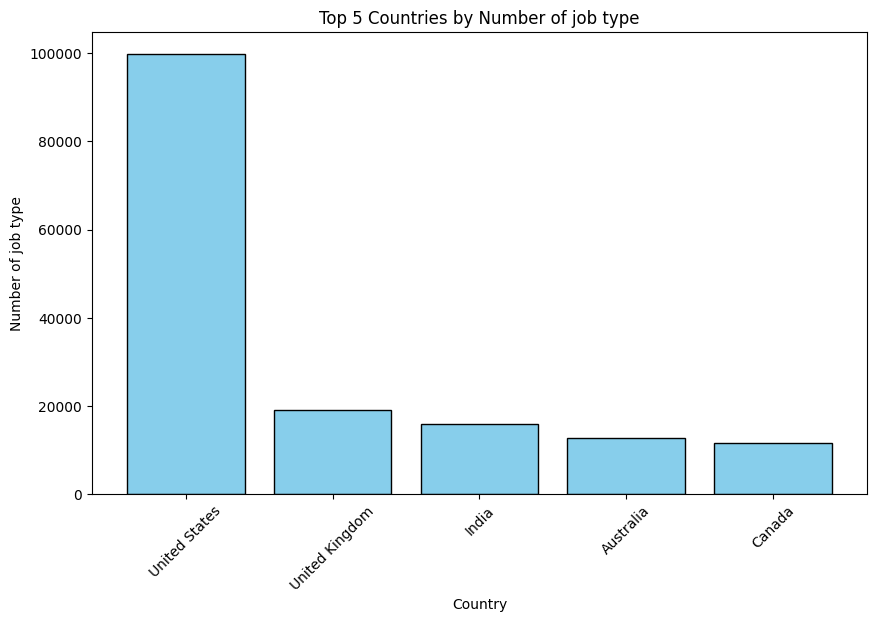

In [39]:
top_countries = pd.DataFrame(country_counts).head()

plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['job_type'], color='skyblue', edgecolor='black')
plt.title('Top 5 Countries by Number of job type')
plt.xlabel('Country')
plt.ylabel('Number of job type')
plt.xticks(rotation=45)
plt.show()


The bar chart ranks countries based on the diversity or volume of job opportunities available.

The prominence of these countries suggests high demand for remote roles, especially in tech and support services (e.g., from India to the U.S./UK)

Hourly Rates

In [40]:
hourly = df[df['is_hourly'] == True]


In [41]:
fixed_job=df[df['is_hourly']==False]

In [42]:
# Get the total number of jobs by summing the number of rows (from shape attribute) of the two DataFrames
Total_jobs = fixed_job.shape[0] + hourly.shape[0]
Total_jobs

244827

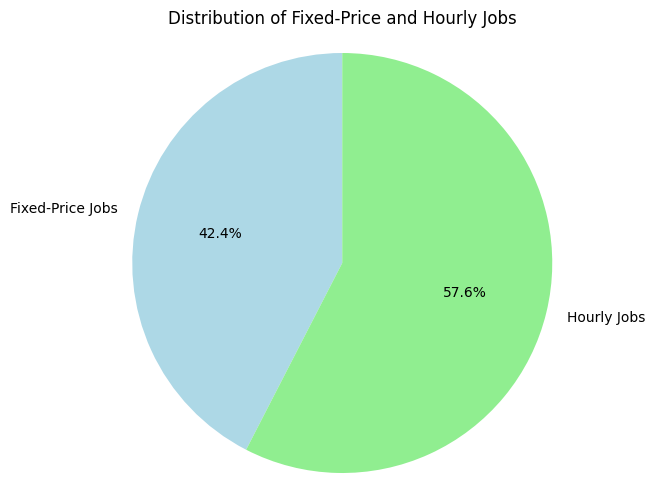

In [43]:
#visualization of total job
plt.figure(figsize=(8, 6))
labels = ['Fixed-Price Jobs', 'Hourly Jobs']
sizes = [len(fixed_job), len(hourly)]
colors = ['lightblue', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Fixed-Price and Hourly Jobs')
plt.show()



In [44]:
# checking keywords
df['cleaned_title']

,cleaned_title
0,experienced medium buyer solar pannel roofing ...
1,full stack developer
2,smma bubble app
3,talent hunter specialized marketing
4,data engineer
...,...
244823,need facebook advertising expert launch product
244824,digitaltelemarketingsalesoutside sale
244825,wordpress template edits
244826,elementor pro quick fix wordpress


In [45]:
# Avg budget
avg_budget = round(hourly['budget'].mean(), 2)
print('Average budget is ',avg_budget)

Average budget is  0.0


In [46]:
Total_budget =sum(df['budget'])
print('Total budget is ',Total_budget)

Total budget is  94693900.0


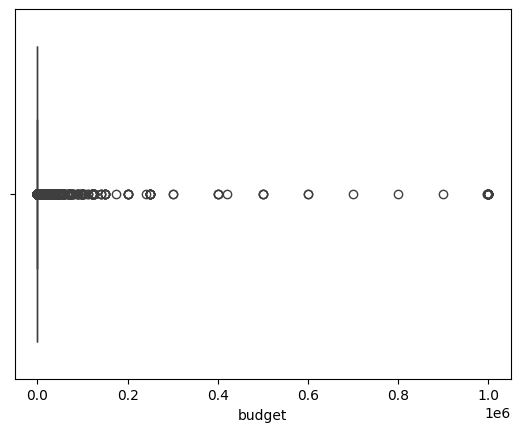

In [47]:
sns.boxplot(df['budget'],orient='y')
plt.show()

 It has to be a horizontal bar chart  showing a metric labeled "DIDO" with numbered categories (① to ⑩) and values ranging from 0.0 to 1.0 on the x-axis.

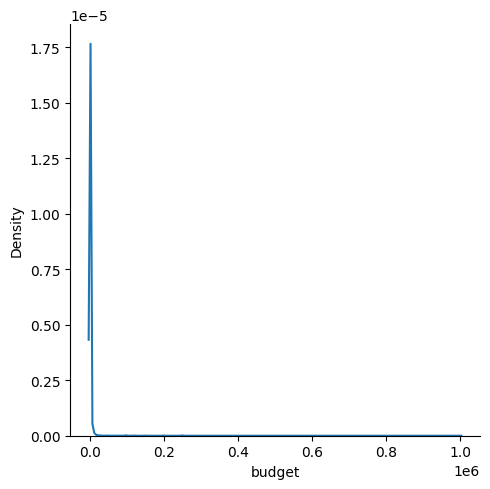

In [48]:
sns.displot(df['budget'],kind='kde')
plt.show()

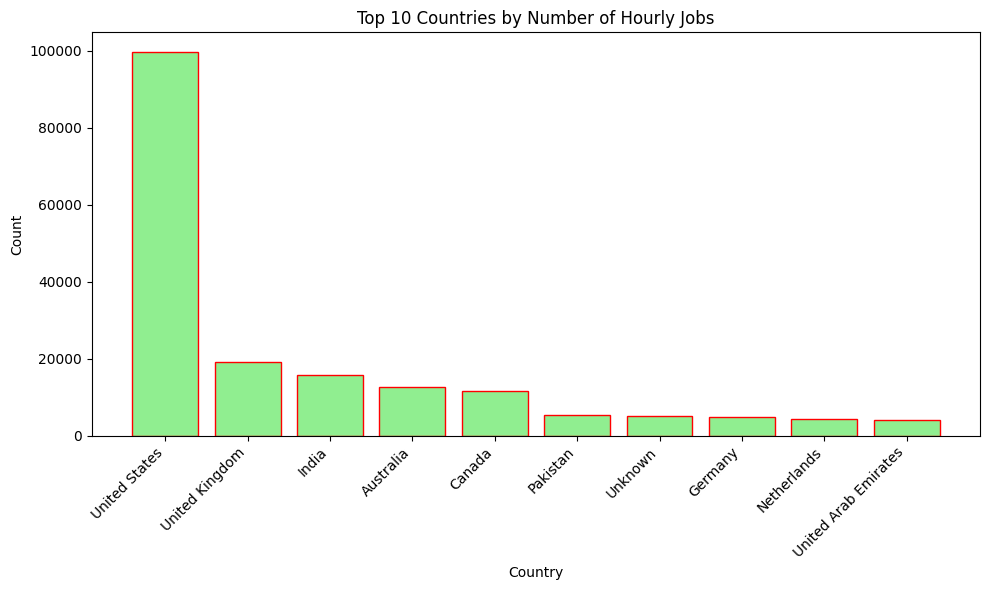

In [49]:
top_10_countries = df.groupby('country')['is_hourly'].count().sort_values(ascending=False).head(10)

df_plot = pd.DataFrame(top_10_countries)

plt.figure(figsize=(10, 6))
plt.bar(df_plot.index, df_plot['is_hourly'], color='lightgreen', edgecolor='red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Number of Hourly Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
# Budget according to job types
budget_by_job_type = df.groupby('job_type')['budget'].mean()
budget_by_job_type

,budget
job_type,
AI / GPT / LLM,122.708029
Admin / VA,307.375043
Blockchain / Crypto,701.400000
Business Analyst,103.680556
Customer Support,192.870273
Data / AI / ML,359.416067
Designer,388.625428
DevOps / IT,326.734835
Finance / Legal,563.836865


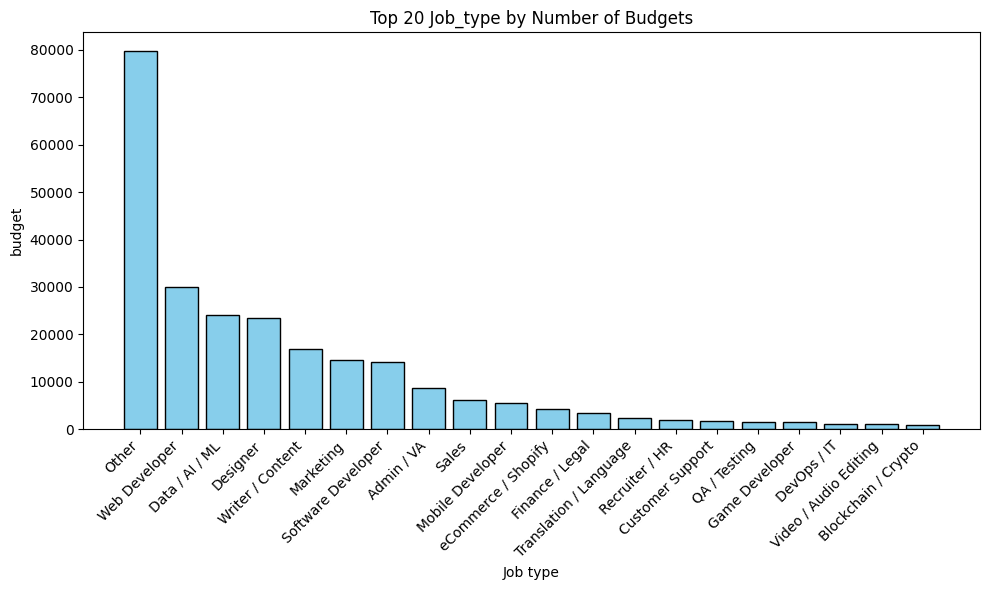

In [51]:
top_20_titles = df.groupby('job_type')['budget'].count().sort_values(ascending=False).head(20)

df_plot = pd.DataFrame(top_20_titles)

plt.figure(figsize=(10, 6))
plt.bar(df_plot.index, df_plot['budget'], color='skyblue', edgecolor='black')
plt.xlabel('Job type')
plt.ylabel('budget')
plt.title('Top 20 Job_type by Number of Budgets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [52]:
pd.DataFrame(df.groupby('country')['budget'].mean().sort_values(ascending=False)).head()

,budget
country,
Barbados,2036.200000
Aland Islands,2000.000000
Sweden,1958.608414
Colombia,1667.829787
Philippines,1577.814922


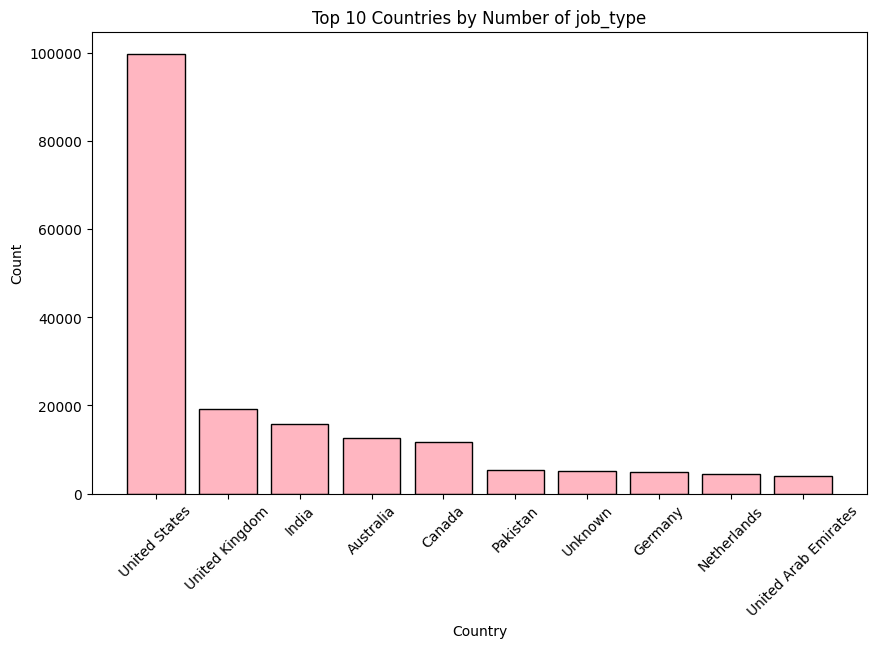

In [53]:
top_10_countries = df.groupby('country')['job_type'].count().sort_values(ascending=False).head(10)

df_plot = pd.DataFrame(top_10_countries)

plt.figure(figsize=(10, 6))
plt.bar(df_plot.index, df_plot['job_type'], color='lightpink', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Number of job_type')
plt.xticks(rotation=45)
plt.show()

Task 1---Analyze the correlation between job title keywords and offered salaries .

In [54]:
#Analyze the correlation between job title keywords and offered salarie
corr=df.groupby('job_type')['budget'].mean().sort_values(ascending=False)

In [55]:
corr

,budget
job_type,
Sales,1570.303993
Project Manager,907.209677
Blockchain / Crypto,701.400000
Mobile Developer,640.798590
Finance / Legal,563.836865
Software Developer,550.993647
Recruiter / HR,448.618414
Designer,388.625428
Marketing,361.749162


In [56]:
# budget according to job type
corr=df.groupby('job_type')['budget'].mean().sort_values(ascending=False)
corr

,budget
job_type,
Sales,1570.303993
Project Manager,907.209677
Blockchain / Crypto,701.400000
Mobile Developer,640.798590
Finance / Legal,563.836865
Software Developer,550.993647
Recruiter / HR,448.618414
Designer,388.625428
Marketing,361.749162


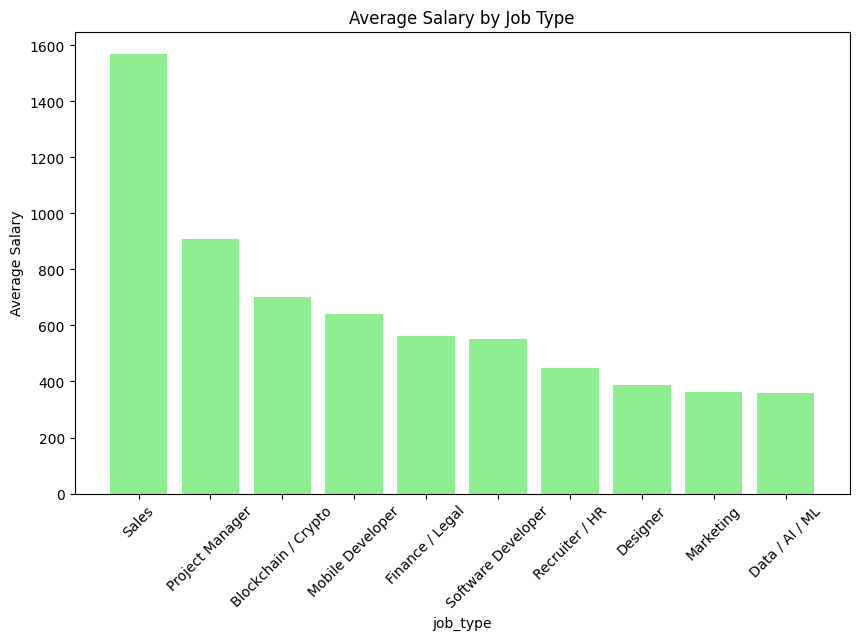

In [57]:
# visualizationof top 10 jobs types
plt.figure(figsize=(10, 6))
plt.bar(corr.index[:10], corr.values[:10], color='lightgreen')
plt.xlabel('job_type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Type')
plt.xticks(rotation=45)
plt.show()




Task 2: Identify emerging job categories based on posting frequency.

In [58]:
#A list of emerging job categories with growth analysis over time
growth_df=df.groupby(['published_month', 'job_type']).size().reset_index(name='postings')
growth_df

,published_month,job_type,postings
0,1,Admin / VA,9
1,1,Customer Support,6
2,1,Data / AI / ML,8
3,1,Designer,5
4,1,Finance / Legal,2
...,...,...,...
70,12,Designer,1
71,12,Marketing,2
72,12,Other,2
73,12,Sales,1


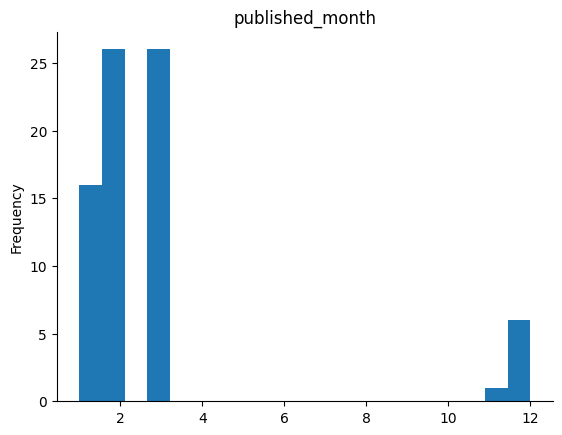

In [59]:
 #@title published_month

from matplotlib import pyplot as plt
growth_df['published_month'].plot(kind='hist', bins=20, title='published_month')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
#Group by month and Job type
trend = df.groupby(['published_month', 'job_type']).size().reset_index(name='count')
pivot = trend.pivot(index='published_month', columns='job_type', values='count').fillna(0)
pivot = pivot.sort_index()
pivot

job_type,AI / GPT / LLM,Admin / VA,Blockchain / Crypto,Business Analyst,Customer Support,Data / AI / ML,Designer,DevOps / IT,Finance / Legal,Game Developer,...,QA / Testing,Recruiter / HR,Sales,Scraper / Automation,Software Developer,Translation / Language,Video / Audio Editing,Web Developer,Writer / Content,eCommerce / Shopify
published_month,,,,,,,,,,,,,,,,,,,,,
1,0.0,9.0,0.0,0.0,6.0,8.0,5.0,0.0,2.0,1.0,...,2.0,0.0,8.0,0.0,6.0,0.0,0.0,5.0,5.0,1.0
2,172.0,3589.0,310.0,30.0,721.0,10252.0,9665.0,439.0,1401.0,588.0,...,640.0,837.0,2501.0,340.0,5903.0,1204.0,401.0,12385.0,7379.0,1773.0
3,239.0,5129.0,560.0,42.0,992.0,13775.0,13681.0,715.0,2042.0,865.0,...,916.0,1118.0,3625.0,493.0,8256.0,1080.0,573.0,17624.0,9425.0,2489.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


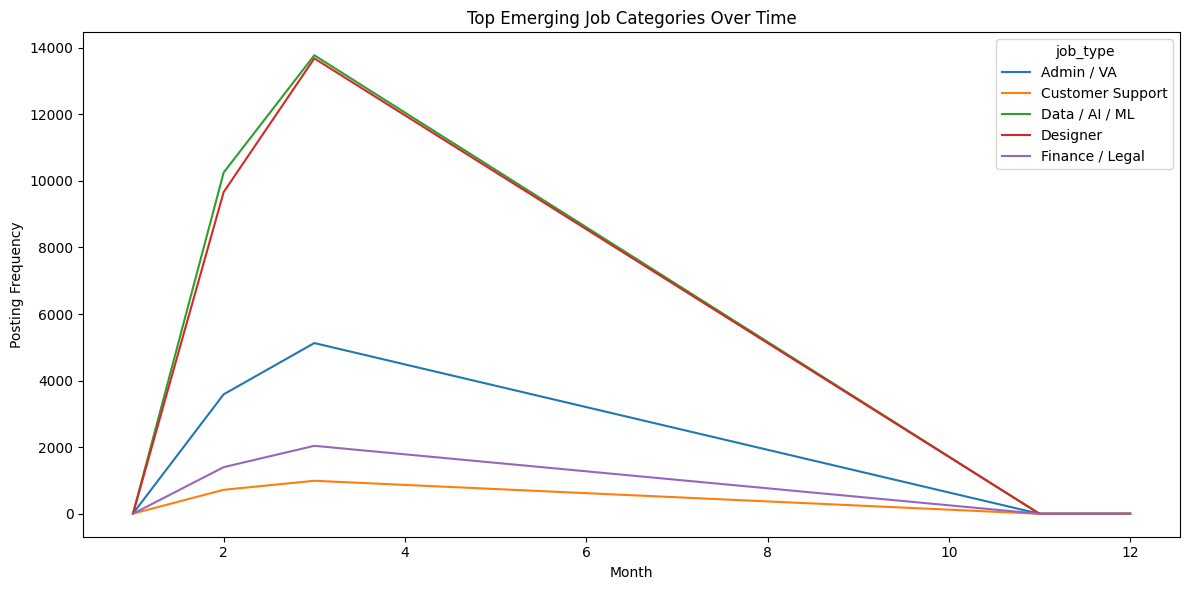

In [61]:
#  plot top  trending categories
top_cats = growth_df.head(5)['job_type']
pivot[top_cats].plot(figsize=(12, 6), title="Top Emerging Job Categories Over Time")
plt.ylabel("Posting Frequency")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [62]:
#Identify emerging job type category based on posting frequency
job_counts = df['job_type'].value_counts()
job_counts

,count
job_type,
Other,79739
Web Developer,30014
Data / AI / ML,24037
Designer,23352
Writer / Content,16811
Marketing,14611
Software Developer,14166
Admin / VA,8727
Sales,6135


Task 3: Predict high-demand job roles by analyzing job posting patterns over time.

In [63]:
#Predict high-demand job roles by analyzing job posting patterns over time
high_demand_roles=df.groupby(['published_month','job_type']).size().reset_index(name='postings')

In [64]:
high_demand_roles

,published_month,job_type,postings
0,1,Admin / VA,9
1,1,Customer Support,6
2,1,Data / AI / ML,8
3,1,Designer,5
4,1,Finance / Legal,2
...,...,...,...
70,12,Designer,1
71,12,Marketing,2
72,12,Other,2
73,12,Sales,1


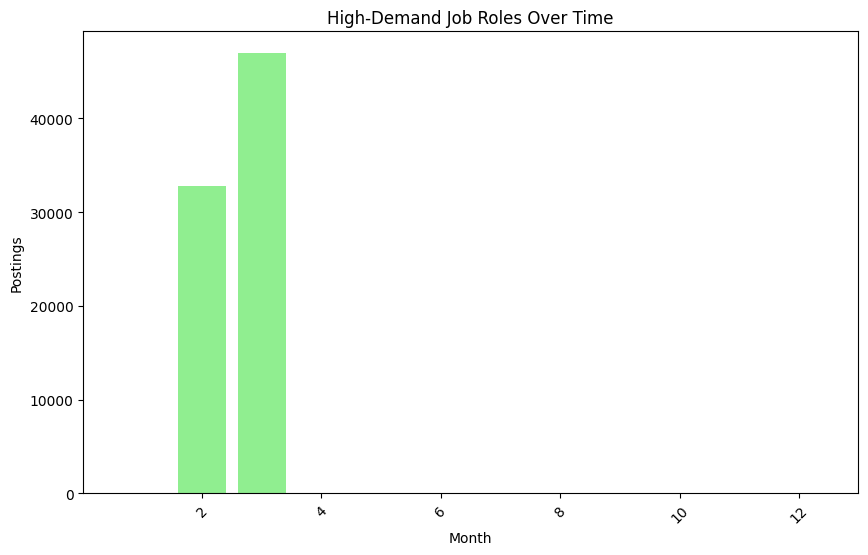

In [65]:
# visualization
plt.figure(figsize=(10, 6))
plt.bar(high_demand_roles['published_month'], high_demand_roles['postings'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Postings')
plt.title('High-Demand Job Roles Over Time')
plt.xticks(rotation=45)
plt.show()

Task 4: Compare average hourly rates across different countries

In [66]:
country_counts = df.groupby('country')['job_type'].count().sort_values(ascending=False)
country_counts

,job_type
country,
United States,99834
United Kingdom,19149
India,15835
Australia,12618
Canada,11658
...,...
Niger,1
Saint Helena,1
Timor-Leste,1


In [67]:
#Compare average hourly rates across different countries
hourly_rates = df[df['is_hourly'] == True].groupby('country')['hourly_low'].mean()
hourly_rates

,hourly_low
country,
Albania,9.811594
Algeria,6.823529
American Samoa,7.333333
Andorra,10.272727
Angola,9.666667
...,...
Venezuela,9.500000
Vietnam,12.217532
Yemen,6.250000


In [68]:
job_category=df.groupby(['country'])[['hourly_low','hourly_high']].mean().reset_index()
job_category.sort_values(by='hourly_low',ascending=False)

,country,hourly_low,hourly_high
195,Turks and Caicos Islands,31.00,62.250
68,French Guiana,28.00,40.000
106,Laos,26.50,276.250
61,Eritrea,25.00,75.000
115,Malawi,22.25,34.375
...,...,...,...
161,Saint Helena,0.00,0.000
196,Tuvalu,0.00,0.000
194,Turkmenistan,0.00,0.000
181,Suriname,0.00,0.000


In [115]:
job_category=df.groupby(['country','job_type'])[['hourly_low','hourly_high']].mean().reset_index()
job_category


,country,job_type,hourly_low,hourly_high
0,Albania,AI / GPT / LLM,0.000000,0.000000
1,Albania,Admin / VA,4.000000,13.333333
2,Albania,Blockchain / Crypto,30.833333,70.333333
3,Albania,Customer Support,20.000000,44.000000
4,Albania,Data / AI / ML,2.500000,5.833333
...,...,...,...,...
2547,Zimbabwe,Software Developer,10.000000,25.000000
2548,Zimbabwe,Translation / Language,8.000000,28.000000
2549,Zimbabwe,Video / Audio Editing,15.000000,25.000000
2550,Zimbabwe,Web Developer,0.000000,0.000000


In [70]:
# avg job wise hourly rate
avg_job_type_budget=df.groupby(['job_type'])[['budget']].mean()/2
avg_job_type_budget


,budget
job_type,
AI / GPT / LLM,61.354015
Admin / VA,153.687521
Blockchain / Crypto,350.700000
Business Analyst,51.840278
Customer Support,96.435137
Data / AI / ML,179.708033
Designer,194.312714
DevOps / IT,163.367418
Finance / Legal,281.918433


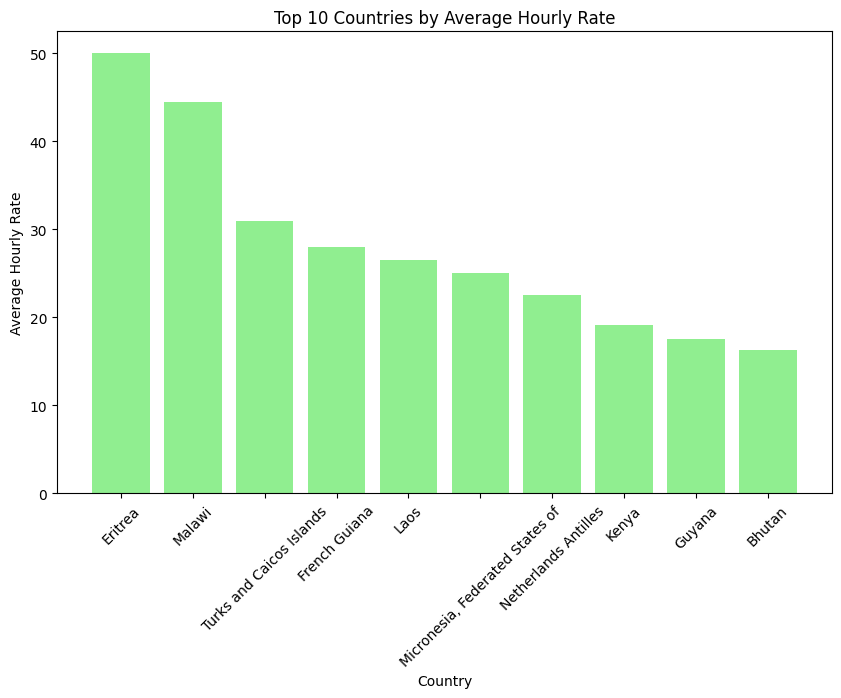

In [71]:
#An interactive map or chart showing hourly rates by country by top 10 country
top_10_countries = hourly_rates.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values, color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Average Hourly Rate')
plt.title('Top 10 Countries by Average Hourly Rate')
plt.xticks(rotation=45)
plt.show()



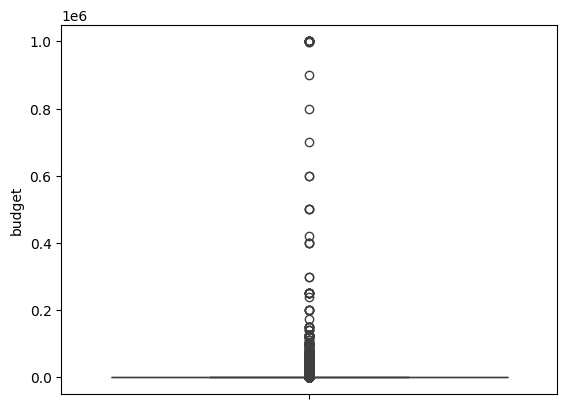

In [72]:
# check the outlier in budget
sns.boxplot(df['budget'])
plt.show()

In [73]:
# Handle outlier of budget
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['budget'] >= lower_bound) & (df['budget'] <= upper_bound)]


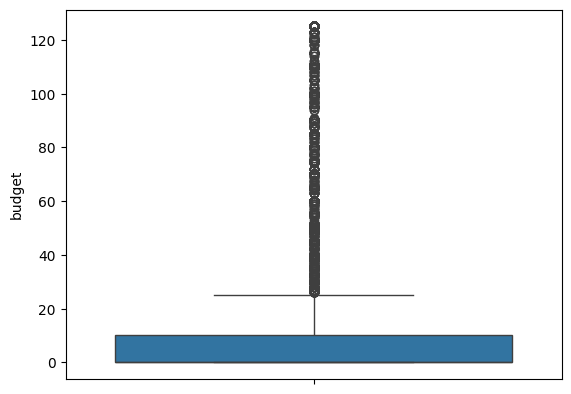

In [74]:
# check the outlier in budget after handle
sns.boxplot(df['budget'])
plt.show()

In [76]:
#An interactive map or chart showing hourly rates by country
import plotly.express as px



In [77]:
#  make map chart
fig = px.choropleth(job_category,
                    locations='country',
                    locationmode='country names',
                    color='hourly_low',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma) # Changed 'scale' to 'color_continuous_scale'
fig.show()

In [78]:
#  make map chart
fig = px.choropleth(job_category,
                    locations='country',
                    locationmode='country names',
                    color='hourly_high',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma) # Changed 'scale' to 'color_continuous_scale'
fig.show()

In [80]:
sum_of_hourly_rate=df.groupby(['job_type'])[['hourly_low','hourly_high']].sum()
sum_of_hourly_rate

,hourly_low,hourly_high
job_type,,
AI / GPT / LLM,2409.0,6018.0
Admin / VA,55525.0,113582.0
Blockchain / Crypto,13535.0,29552.0
Business Analyst,905.0,1864.0
Customer Support,13388.0,28003.0
Data / AI / ML,175842.0,417225.0
Designer,165706.0,392138.0
DevOps / IT,12990.0,27567.0
Finance / Legal,54706.0,125783.0


In [81]:
# total sum of low and high hourly rate
df['total_hourly_cost'] = df['hourly_low'] + df['hourly_high']


In [82]:
df['total_hourly_cost']

,total_hourly_cost
2,40.0
3,0.0
5,0.0
6,0.0
7,29.0
...,...
244823,120.0
244824,0.0
244825,35.0
244826,0.0


In [132]:
# Calculate the total hourly cost for each country and add it to the 'job_category'
job_category['total_hourly_cost'] = job_category['hourly_low'] + job_category['hourly_high']

#  Now created the map chart using the updated 'job_category'
fig = px.choropleth(job_category,
                    locations='country',
                    locationmode='country names',
                    color='total_hourly_cost',  # Now refers to a column in 'job_category'
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [84]:
# job type wise total hourly cost
total_hourly_cost=df.groupby(['job_type'])[['total_hourly_cost']].sum()
total_hourly_cost

,total_hourly_cost
job_type,
AI / GPT / LLM,8427.0
Admin / VA,169107.0
Blockchain / Crypto,43087.0
Business Analyst,2769.0
Customer Support,41391.0
Data / AI / ML,593067.0
Designer,557844.0
DevOps / IT,40557.0
Finance / Legal,180489.0


In [85]:
# we need 2 decimal code
df['total_hourly_cost'] = df['total_hourly_cost'].round(2)
df['total_hourly_cost']

,total_hourly_cost
2,40.0
3,0.0
5,0.0
6,0.0
7,29.0
...,...
244823,120.0
244824,0.0
244825,35.0
244826,0.0


In [86]:
# Calculate the average hourly rate and assign it to a new column
df['total_avg_hourly'] = (df['hourly_low'] + df['hourly_high']) / 2

# Now  the 'total_avg_hourly' column
df['total_avg_hourly'].unique()

array([ 20. ,   0. ,  14.5,  57.5,  40. ,  21. ,   6. ,  22.5,  32.5,
        10.5,  10. , 100. ,  35. ,   9. ,   5. ,   1.5,  17.5,  23.5,
        37.5,  52.5,   4.5,  26.5,  13.5,   7.5,   4. ,  55. ,  34.5,
        45. ,  25. ,   7. ,  17. ,  77.5,  19.5,  70. ,  12.5,  15. ,
        27.5,  28.5,  19. ,  21.5,  65. ,   2. ,  30. ,  16.5, 151.5,
         5.5, 185. ,  62.5, 237.5,  50. ,  32. , 350. ,  34. ,  42.5,
        13. ,  16. ,   3.5,   2.5,  20.5, 105. ,  18.5,  75. ,  85. ,
         6.5,  47.5,  26. ,  24.5,  24. ,  54. ,  80. ,  87.5,  23. ,
        31.5,  18. ,  90. ,  51.5,  31. ,  37. ,  67.5,  80.5,  92.5,
        58.5, 450. ,  95. ,  11.5,  72.5,  27. ,  59. ,   9.5,  82.5,
        11. ,  29.5,  25.5,  49. ,  40.5, 175. ,  30.5,  15.5,  46.5,
        48. , 150. ,   8. ,  33. ,  60.5,  60. ,  51. ,   8.5, 102.5,
       122.5,  14. ,  69. ,  36.5,  67. ,  28. ,  66. , 271.5,  62. ,
        36. , 130. ,  73.5,  44. ,  93.5,  29. ,  50.5, 115. ,  63. ,
        43.5,  22. ,

In [87]:
# #An interactive chart showing hourly rates by to 10 country
# top_10_countries = df.groupby('country')['total_avg_hourly'].mean().sort_values(ascending=False).head(10)

# plt.figure(figsize=(10, 6))
# plt.bar(df['country'], df['total_avg_hourly'], color='lightgreen')
# plt.xlabel('Country')
# plt.ylabel('Average Hourly Rate')
# plt.title('Hourly Rates by Country')
# plt.xticks(rotation=70)
# plt.show()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203082 entries, 2 to 244827
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                203082 non-null  object             
 1   link                 203082 non-null  object             
 2   published_date       203082 non-null  datetime64[ns, UTC]
 3   is_hourly            203082 non-null  bool               
 4   hourly_low           203082 non-null  float64            
 5   hourly_high          203082 non-null  float64            
 6   budget               203082 non-null  float64            
 7   country              203082 non-null  object             
 8   cleaned_title        203082 non-null  object             
 9   job_type             203082 non-null  object             
 10  published_date_only  203082 non-null  datetime64[ns]     
 11  published_time       203082 non-null  datetime64[ns]     
 12  publish

Task -6   Track changes in job market dynamics over months.

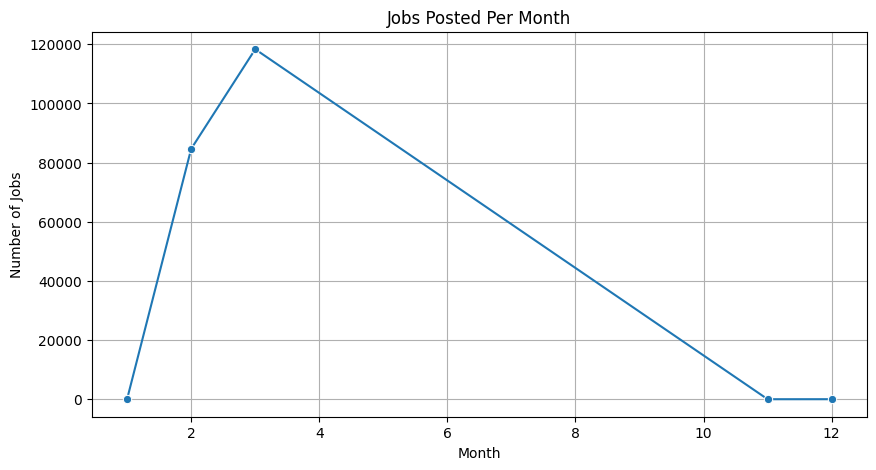

In [89]:
#A dashboard that updates monthly with new trends in the job market

#Line Chart – Jobs Posted per Month
monthly_jobs = df.groupby('published_month').size().reset_index(name='job_count')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_jobs, x='published_month', y='job_count', marker='o')
plt.title('Jobs Posted Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.show()



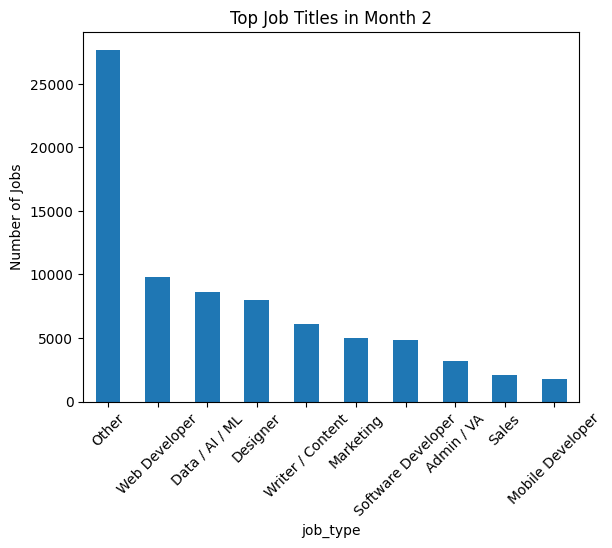

In [90]:
# Top job titles for a specific month

month = 2 # You can change the month

top_titles = df[df['published_month'] == month]['job_type'].value_counts().head(10)


if not top_titles.empty:
    top_titles.plot(kind='bar', title=f"Top Job Titles in Month {month}")
    plt.ylabel('Number of Jobs')
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"No job titles found for month {month} to display.")

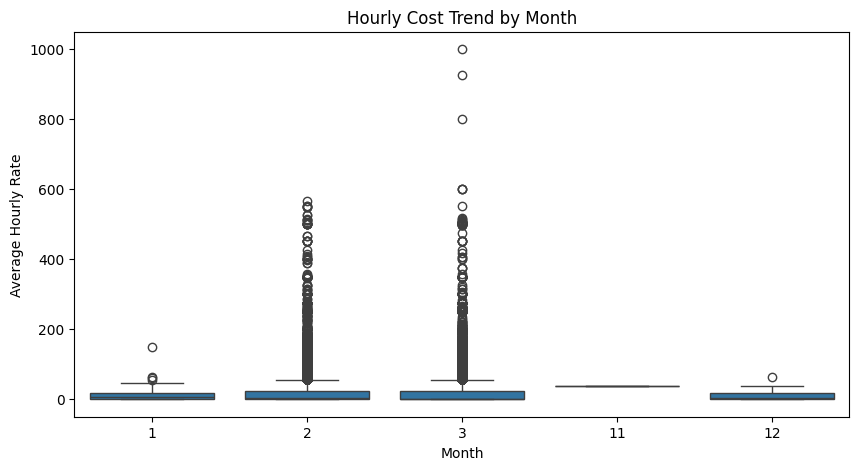

In [91]:
#Box Plot – Salary Trends

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='published_month', y='total_avg_hourly')
plt.title('Hourly Cost Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Hourly Rate')
plt.show()


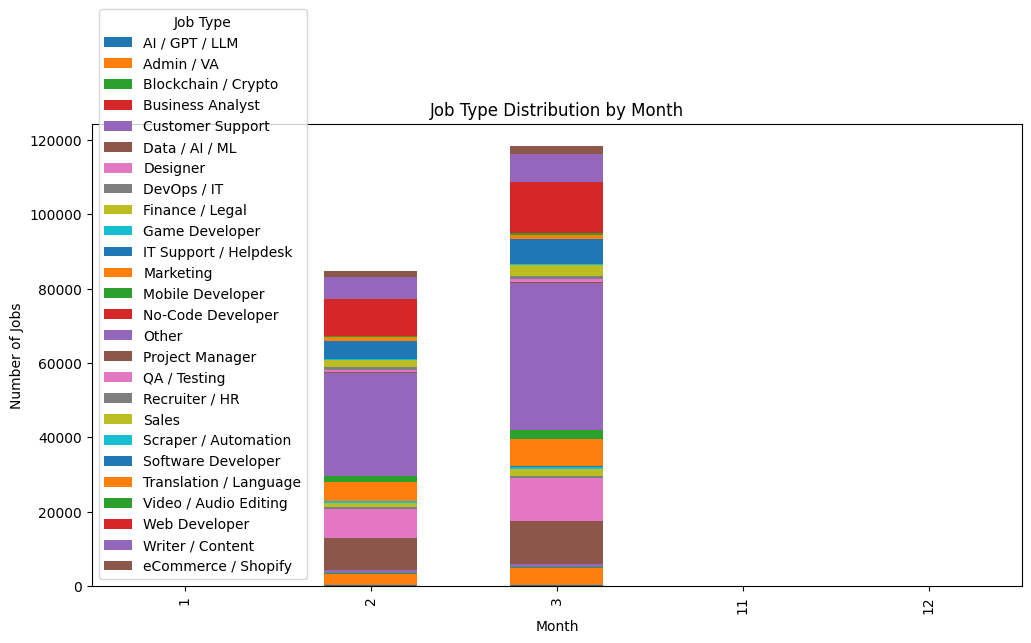

In [92]:
#Bar Chart – Job Type Distribution
job_type_monthly = df.groupby(['published_month', 'job_type']).size().unstack().fillna(0)

job_type_monthly.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Type')
plt.show()


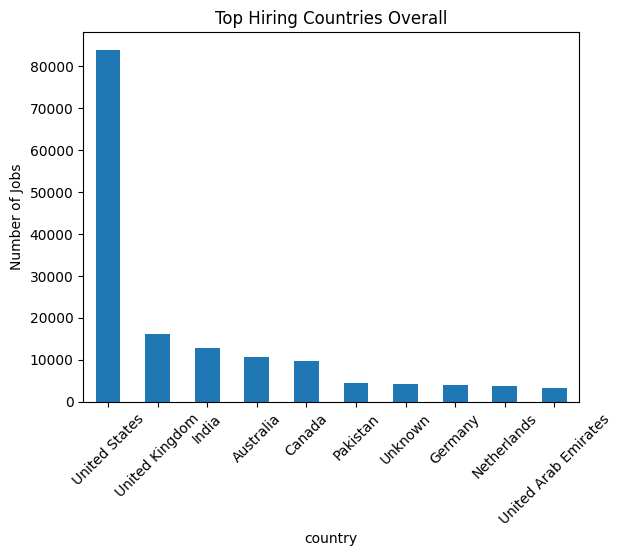

In [93]:
#Bar Chart – Top Countries

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top Hiring Countries Overall')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()




Task  --Create a job recommendation engine based on current job postings ● O

In [94]:
#To develop a personalized job recommendation engine


In [95]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [96]:
# TF-IDF vectorization of job titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["cleaned_title"])

def recommend_jobs(user_input, top_n=5):
    # Transform user input into TF-IDF vector
    user_vec = vectorizer.transform([user_input.lower()])

    # Calculate cosine similarity between input and all job titles
    similarity_scores = cosine_similarity(user_vec, tfidf_matrix).flatten()

    # Get indices of top matching jobs
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    # Return top job postings
    return df.iloc[top_indices][["title", "country", "job_type", "total_avg_hourly", "link"]]


Uses TF-IDF to vectorize job titles and compute similarity with user skills.

Returns the top  jobs matching the user’s skills (e.g., "python data engineer").

Outputs relevant job details for user review.

In [97]:
user_query = "machine learning data science"
recommendations = recommend_jobs(user_query, top_n=5)

# Display
recommendations


,title,country,job_type,total_avg_hourly,link
115685,"Machine, learning, and data science assistant",United States,Data / AI / ML,10.0,https://www.upwork.com/jobs/Machine-learning-a...
105460,"Consultation with AI, Data Science, and Machin...",Canada,Data / AI / ML,50.0,https://www.upwork.com/jobs/Consultation-with-...
204356,"Full-Stack Developer, Data Science, Machine Le...",United States,Software Developer,70.0,https://www.upwork.com/jobs/Full-Stack-Develop...
152251,"Simple data science, machine learning, regress...",Norway,Data / AI / ML,0.0,https://www.upwork.com/jobs/Simple-data-scienc...
133813,Machine learning,Hong Kong,Data / AI / ML,35.0,https://www.upwork.com/jobs/Machine-learning_%...


In [98]:
user_query = "web developer"
recommendations = recommend_jobs(user_query, top_n=5)

# Display
recommendations

,title,country,job_type,total_avg_hourly,link
117400,Web Developer,Belgium,Web Developer,20.0,https://www.upwork.com/jobs/Web-Developer_%7E0...
244379,Web Developer,Italy,Web Developer,0.0,https://www.upwork.com/jobs/Web-Developer_%7E0...
132397,Web Developer,United States,Web Developer,19.0,https://www.upwork.com/jobs/Web-Developer_%7E0...
45753,Web Developer,United Kingdom,Web Developer,47.5,https://www.upwork.com/jobs/Web-Developer_%7E0...
6945,Web Developer,United Kingdom,Web Developer,35.0,https://www.upwork.com/jobs/Web-Developer_%7E0...


In [99]:
filtered_df = df[df["country"] == "United States"]

#filtered_df

In [100]:
filtered_df = df[df["country"] == "India"]

#filtered_df

In [101]:
#Save to Pickle

import pickle

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save the TF-IDF matrix
with open("tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

# Save the original DataFrame (job data)
df[["title", "cleaned_title", "country", "job_type", "total_avg_hourly", "link"]].to_pickle("job_data.pkl")


In [103]:
# def recommend_jobs(user_input, top_n=5):
#     user_vec = vectorizer.transform([user_input.lower()])
#     similarity_scores = cosine_similarity(user_vec, tfidf_matrix).flatten()
#     top_indices = similarity_scores.argsort()[-top_n:][::-1]
#     return df.iloc[top_indices]


Task -Investigate trends in the remote work landscape.


In [104]:
df["is_remote"] = df["cleaned_title"].str.contains("remote|work from home|wfh")
df["is_remote"]

,is_remote
2,False
3,False
5,False
6,False
7,False
...,...
244823,False
244824,False
244825,False
244826,False


<Axes: xlabel='is_remote', ylabel='total_avg_hourly'>

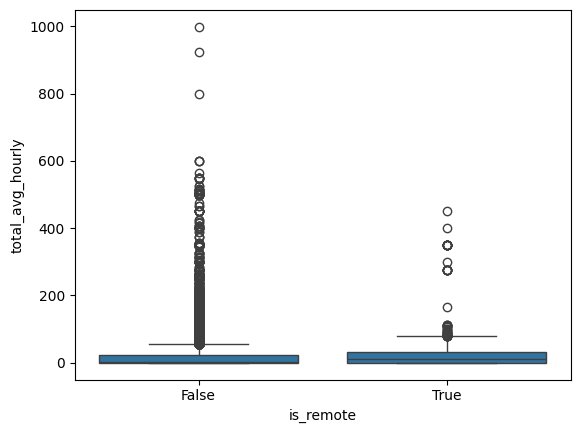

In [105]:
import seaborn as sns
sns.boxplot(data=df, x="is_remote", y="total_avg_hourly")


In [106]:
remote_by_country = df[df["is_remote"] == True]["country"].value_counts().head(10)
remote_by_country


,count
country,
United States,723
United Kingdom,49
India,40
Australia,30
Canada,25
Unknown,21
Netherlands,17
Japan,14
Philippines,13


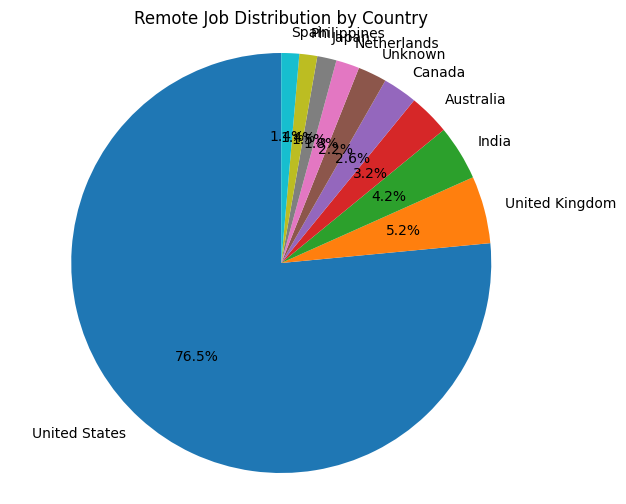

In [124]:
# pie plot for  top 20 coutry wise job

plt.figure(figsize=(7, 6))
plt.pie(remote_by_country, labels=remote_by_country.index, autopct='%1.1f%%', startangle=90)
plt.title('Remote Job Distribution by Country')
plt.axis('equal')
plt.show()

<Axes: title={'center': 'Monthly Share of Remote Jobs'}, xlabel='published_month', ylabel='Remote %'>

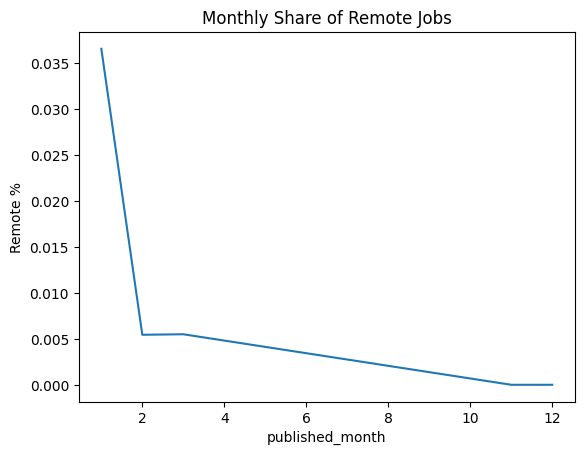

In [108]:
monthly_remote = df[df['is_remote']].groupby('published_month').size()
monthly_total = df.groupby('published_month').size()
remote_ratio = (monthly_remote / monthly_total).fillna(0)

remote_ratio.plot(title="Monthly Share of Remote Jobs", ylabel="Remote %")


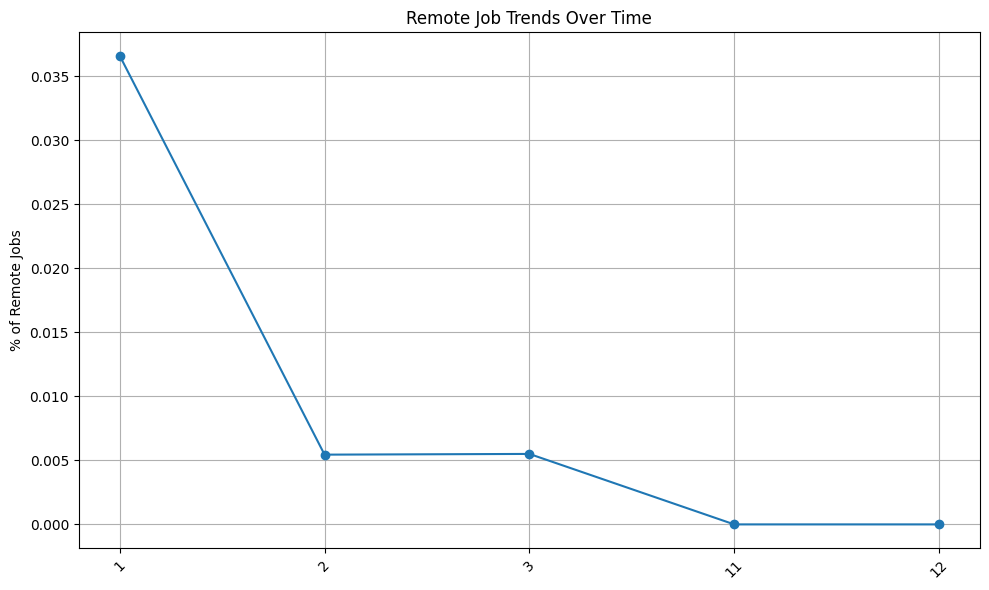

In [109]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(remote_ratio.index.astype(str), remote_ratio.values, marker='o') # Use remote_ratio.index and remote_ratio.values
plt.xticks(rotation=45)
plt.ylabel('% of Remote Jobs')
plt.title('Remote Job Trends Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

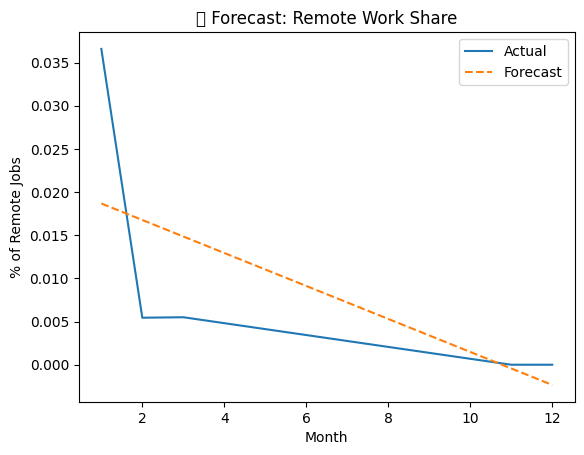

In [110]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create dataset
months = np.array(remote_ratio.index).reshape(-1, 1)
values = remote_ratio.values

model = LinearRegression().fit(months, values)
predicted = model.predict(months)

plt.plot(months, values, label="Actual")
plt.plot(months, predicted, label="Forecast", linestyle="--")
plt.legend()
plt.title("📉 Forecast: Remote Work Share")
plt.xlabel("Month") # Added x-label for clarity
plt.ylabel("% of Remote Jobs") # Added y-label for clarity
plt.show() # Added plt.show() to display the plot

Task-  Predict future job market trends.

In [111]:
import pandas as pd

#
df['published_date'] = pd.to_datetime(df['published_date'])
df['month'] = df['published_date'].dt.to_period('M')
df['title'] = df['title'].str.lower()

In [129]:
monthly_trends = df.groupby(['month', 'job_type']).size().unstack(fill_value=0)
monthly_trends = monthly_trends.astype('int')
monthly_trends.index = monthly_trends.index.to_timestamp()

In [113]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

print("Available Job Types for Forecasting:")
print(monthly_trends.columns.tolist())

job_type = 'Web Developer'

# Train ARIMA model
series = monthly_trends[job_type]
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
#forecast

Available Job Types for Forecasting:
['AI / GPT / LLM', 'Admin / VA', 'Blockchain / Crypto', 'Business Analyst', 'Customer Support', 'Data / AI / ML', 'Designer', 'DevOps / IT', 'Finance / Legal', 'Game Developer', 'IT Support / Helpdesk', 'Marketing', 'Mobile Developer', 'No-Code Developer', 'Other', 'Project Manager', 'QA / Testing', 'Recruiter / HR', 'Sales', 'Scraper / Automation', 'Software Developer', 'Translation / Language', 'Video / Audio Editing', 'Web Developer', 'Writer / Content', 'eCommerce / Shopify']


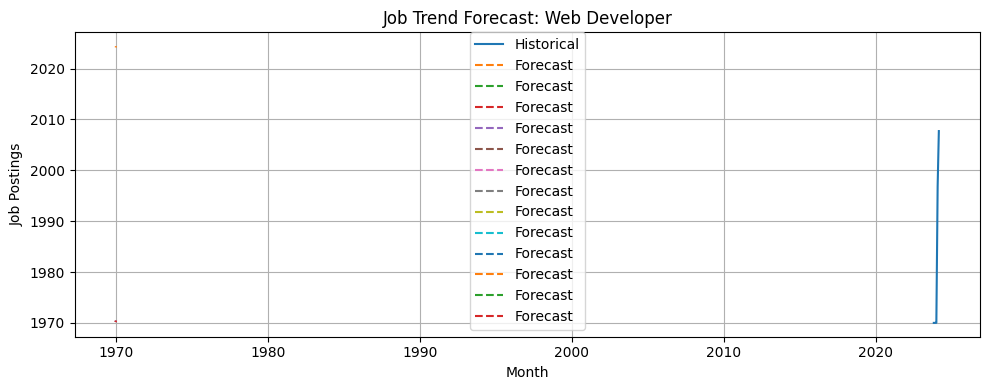

In [130]:
# Plot
plt.figure(figsize=(10,4))
plt.plot(series, label='Historical')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f'Job Trend Forecast: {job_type}')
plt.xlabel('Month')
plt.ylabel('Job Postings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [131]:
from prophet import Prophet

# Prepare time-series data
ts_data = df[df['cleaned_title'].str.contains('web developer')][['published_date']].copy()
ts_data['count'] = 1
ts_data = ts_data.resample('M', on='published_date').sum().reset_index()
ts_data.columns = ['ds', 'y']

# Initialize and fit Prophet model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(ts_data)

# Forecast for the next 2 months
future = model.make_future_dataframe(periods=2, freq='M')
forecast = model.predict(future)

# Print forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())



INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq8imj_33/f3a1584m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq8imj_33/t0ajpbuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31976', 'data', 'file=/tmp/tmpq8imj_33/f3a1584m.json', 'init=/tmp/tmpq8imj_33/t0ajpbuy.json', 'output', 'file=/tmp/tmpq8imj_33/prophet_modelmczi8klv/prophet_model-20250529165319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
0 2024-02-29  374.999898  374.999898  374.999898
1 2024-03-31  545.999727  545.999727  545.999727
2 2024-04-30  711.483432  711.483429  711.483437
3 2024-05-31  882.483261  882.483248  882.483275


In [128]:
# Update Chart.js with forecast data
forecast_data = forecast[['ds', 'yhat']].tail(2)
forecast_data['ds'] = forecast_data['ds'].dt.strftime('%Y-%m')
forecast_data

,ds,yhat
2,2024-04,121.967779
3,2024-05,153.967781


We have created Group the data by job type (e.g., extracted from title) and time period, then use a library like prophet or statsmodels to forecast future job postings.

 This can help identify trending job categories for recommendations.

Aggregates "web developer" job postings by month.

Uses Prophet to forecast job postings for the next 2 months.

Outputs forecasted values (yhat) and confidence intervals.

Updates the Chart.js configuration with actual forecast data (modify the earlier chart code to include forecast_data).

##Conclusion

In this notebook  we provides a foundation for analyzing Upwork job postings

particularly in feature engineering, recommendation system implementation, and forecasting. By

improving data preprocessing (e.g., better handling of missing values, feature extraction), conducting thorough EDA,

and implementing a recommendation system using NLP or machine learning, the project can effectively recommend jobs to users

and forecast market trends. The dataset’s rich information (job titles, budgets, countries) offers opportunities to uncover
valuable insights, such as high-demand roles and regional preferences, which can benefit both job seekers and employers. Completing

the forecasting model and adding interactive visualizations will further enhance the project’s utility for job market analysis and recommendation.
